In [2]:
# pip install xmltodict

In [5]:
# 농수축 & 이미용 EDAddd
# !pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from tqdm.notebook import tqdm
import requests
import xmltodict
import re

import pickle
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# pd.set_option('display.max_rows', 100)
%matplotlib inline
plt.style.use('ggplot') # 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.rcParams['font.family'] = 'Malgun Gothic'

In [6]:
# 나눔고딕코드 폰트 설치 (필요한사람만 돌리세요)
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# plt.rc('font', family='NanumBarunGothic')

In [8]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    from google.colab import drive
    drive.mount('/content/drive')
    sum_df = pd.read_csv('/content/drive/My Drive/빅데이터_콘테스트/sum_df.csv')

else:
    print('Not running on CoLab')
    sum_df = pd.read_csv('c:/bc/sum_df.csv')

Not running on CoLab


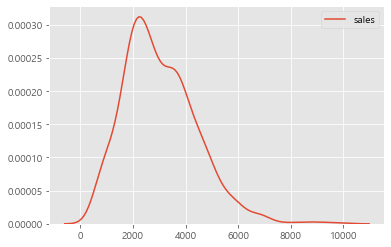

In [38]:
sns.kdeplot(sum_df[sum_df.p_group == '농수축'].sales)

Text(0.5, 0, 'Sales')

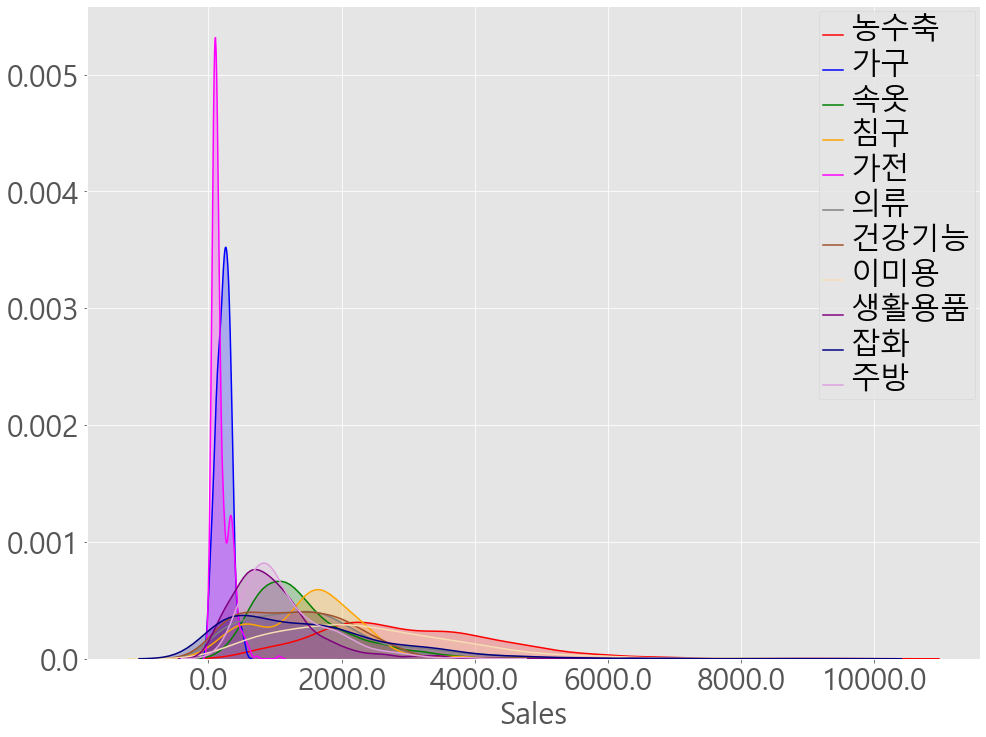

In [77]:
plt.figure(figsize=(16,12))
g = sns.kdeplot(sum_df['sales'][(sum_df['p_group']=='농수축')], color='Red', shade=True, label = '농수축')
g = sns.kdeplot(sum_df['sales'][(sum_df['p_group']=='가구')], color='Blue', shade=True, label = '가구')
g = sns.kdeplot(sum_df['sales'][(sum_df['p_group']=='속옷')], color='Green', shade=True, label = '속옷')
g = sns.kdeplot(sum_df['sales'][(sum_df['p_group']=='침구')], color='Orange', shade=True, label = '침구')
g = sns.kdeplot(sum_df['sales'][(sum_df['p_group']=='가전')], color='Magenta', shade=True, label = '가전')
g = sns.kdeplot(sum_df['sales'][(sum_df['p_group']=='의류')], color='Grey', shade=True, label = '의류')
g = sns.kdeplot(sum_df['sales'][(sum_df['p_group']=='건강기능')], color='Sienna', shade=True, label = '건강기능')
g = sns.kdeplot(sum_df['sales'][(sum_df['p_group']=='이미용')], color='Wheat', shade=True, label = '이미용')
g = sns.kdeplot(sum_df['sales'][(sum_df['p_group']=='생활용품')], color='Purple', shade=True, label = '생활용품')
g = sns.kdeplot(sum_df['sales'][(sum_df['p_group']=='잡화')], color='Navy', shade=True, label = '잡화')
g = sns.kdeplot(sum_df['sales'][(sum_df['p_group']=='주방')], color='Plum', shade=True, label = '주방')


plt.setp(g.get_legend().get_texts(), fontsize='30') # for legend text
g.set_yticklabels(g.get_yticks(), size = 30)
g.set_xticklabels(g.get_xticks(), size = 30)
g.set_xlabel('Sales', fontsize=30)

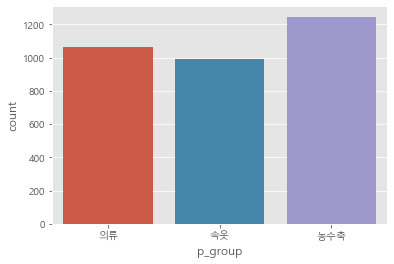

In [88]:
sns.countplot(x='p_group', data=sum_df[(sum_df['p_group'] == '의류')|(sum_df['p_group']=='농수축')|(sum_df['p_group']=='속옷')])

In [9]:
# seasons = [4, 4, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4]
# month_to_season = dict(zip(range(1,13), seasons))

# sum_df['season'] = sum_df.MONTH.map(month_to_season)

In [10]:
# sum_df['HOUR'] = sum_df['HOUR'].replace(0,24).replace(1,25).replace(2,26)

In [11]:
# sum_df['timeslot'] = pd.cut(sum_df.HOUR, bins = [5,8,11,14,17,20,23,26], \
#                              labels = [1,2,3,4,5,6,7])

In [12]:
# month = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

# total = {}
# for i in month:
#     service_key = 'JJC5IlOjBjhMwMvARvd2a0D3jVjHuA3DDvF1NZ27DH4pbq5Y1bzUmA0zYt6BOvI562qNa8Z87PlDLZZjYHA3YA%3D%3D'
#     service_key_decode = requests.utils.unquote(service_key)

#     req_params = {'ServiceKey' : service_key_decode, 'solYear' : '2019', 'solMonth' : i}
#     req_url = 'http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService/getHoliDeInfo'

#     resp = requests.get(req_url, params =req_params)
#     xml_data = resp.text
#     dict_data = xmltodict.parse(xml_data)

#     if dict_data ['response']['body']['items'] is not None:
#         data = dict_data ['response']['body']['items']['item']

#         total[i] =  data

# month_1 = ['01', '03', '06', '08', '12']

# 공휴일 = []
# for  mon in month:
#     if mon in month_1 :
#         date = total[mon]['locdate']
#         holiday = total[mon]['isHoliday']
#         공휴일.append(date)

# month_2 = ['02', '05', '09', '10']
# for mon in month:
#     if mon in month_2 :
#         len_mon = len(total[mon])
#         for d in range(len_mon):
#             date = total[mon][d]['locdate']
#             holiday = total[mon][d]['isHoliday']
#             공휴일.append(date)
            
# 공휴일 = pd.to_datetime(공휴일, format='%Y-%m-%d', errors='raise')

In [13]:
# def holiday(date):  
#     if date in 공휴일 :
#         holi = 1
#     else:
#         holi = 0
#     return holi

# sum_df['공휴일'] = sum_df['YEAR_DAY'].map(lambda x : holiday(x))

# def weekend(day_name):
#     if day_name in ['Saturday', 'Sunday']:
#         holiday =  1
#     else :
#         holiday = 0
#     return holiday

# sum_df['weekend'] = sum_df['DAY_NAME'].map(lambda x : weekend(x))

In [14]:
# 쉬는날 = []
# weekend = sum_df['weekend']
# holi = sum_df['공휴일']

# for i in range(len(sum_df)):
#     if weekend[i] == 1 or holi[i] == 1 :
#         쉬는날.append(1)
#     else:
#         쉬는날.append(0)

In [15]:
# del sum_df['weekend']
# del sum_df['공휴일']
# sum_df['holiday'] = 쉬는날

In [16]:
def df_split(group):
    return sum_df[sum_df['p_group']==group]

In [17]:
def sales_split(group):
    return pd.qcut(sum_df[sum_df['p_group']==group].sales, q=5,labels=[1,2,3,4,5]).to_frame().rename(columns={'sales':'sales_group'})

In [18]:
# def unit_split(group):
#     return pd.qcut(sum_df[sum_df['p_group']==group].unit_price, q=5,labels=[1,2,3,4,5]).to_frame().rename(columns={'unit_price':'unit_group'})

In [19]:
interested_group_list = list(sum_df.p_group.unique())
# ['의류', '속옷', '주방', '농수축', '이미용', '가전', '생활용품', '건강기능', '잡화', '가구', '침구']
for group in interested_group_list:
    for idx, value in zip(sales_split(group).index,sales_split(group).sales_group):
        sum_df.loc[idx,'sales_group'] = value

In [20]:
sum_df.timeslot.isnull().sum()

0

In [81]:
# # sum_df = sum_df[(sum_df['sales_group'] >= 4)|(sum_df['sales_group'] <= 2)].reset_index(drop=True)
sum_df['score'] = 'temp'
for row, value in enumerate(sum_df.sales_group):
    if value <= 2:
        sum_df.score[row] = 0
    elif value >= 4:
        sum_df.score[row] = 1

C:\Users\moon\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\moon\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [82]:
sum_df

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,YEAR,...,p_group_code,new_code,no,sales_level,grade,season,timeslot,holiday,sales_group,score
0,2019-01-01 06:00:00,60.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,32696000.0,820.0,2019,...,0,13.0,0,b,4,4,1,1,2.0,0
1,2019-01-01 07:00:00,60.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,47878000.0,812.0,2019,...,1,7.0,6,b,4,4,1,1,2.0,0
2,2019-01-01 08:00:00,60.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,99736000.0,1665.0,2019,...,0,16.0,9,d,3,4,1,1,4.0,1
3,2019-01-01 09:00:00,60.0,100816,202404,보코 리버시블 무스탕,의류,79000,90973000.0,1151.0,2019,...,0,18.0,12,c,3,4,2,1,3.0,2
4,2019-01-01 10:00:00,60.0,100809,202395,CERINI by PAT 남성 풀패키지 기모니트 3종,의류,79900,259678000.0,3250.0,2019,...,0,17.0,15,e,2,4,2,1,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6963,2019-12-31 18:20:00,60.0,100356,201134,마르엘라로사티 에코무스탕1종,의류,79000,201322000.0,2548.0,2019,...,0,8745.0,38259,e,2,4,5,0,5.0,1
6964,2019-12-31 19:20:00,60.0,100594,201819,레스토닉 블루투스 LED 서랍 침대 슈퍼싱글,가구,599000,102360000.0,155.0,2019,...,10,8723.0,38262,a,3,4,5,0,2.0,0
6965,2019-12-31 20:20:00,60.0,100501,201516,무이자 국내제조 노비타 뉴스파 비데 무료설치,생활용품,219000,191710000.0,762.0,2019,...,6,8741.0,38271,b,2,4,5,0,3.0,2
6966,2019-12-31 21:20:00,60.0,100155,200556,일시불 LG전자 매직스페이스 냉장고,가전,1359000,222022000.0,157.0,2019,...,5,8725.0,38283,a,2,4,6,0,4.0,1


In [33]:
# sum_df.to_csv('c:/bc/sum_df.csv', index = False)

# 시간대별

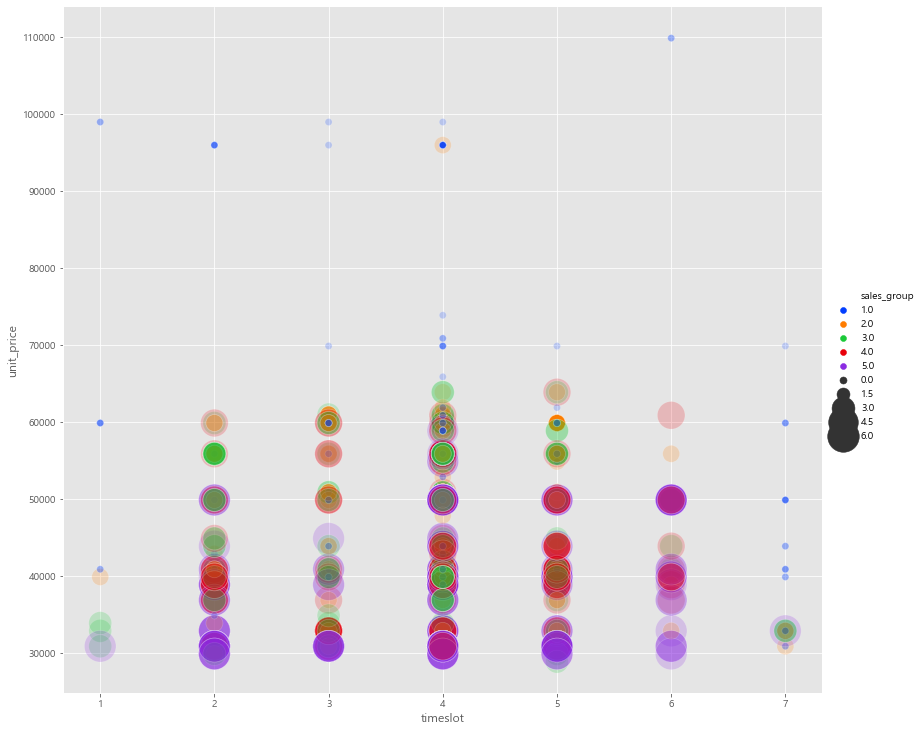

In [34]:
sns.relplot(x='timeslot',y='unit_price', palette='bright', size='sales_group', hue='sales_group', sizes=(50,1000), data=sum_df[sum_df['p_group']=='농수축'], alpha=0.2, height=10.27, aspect=11.7/10.27)

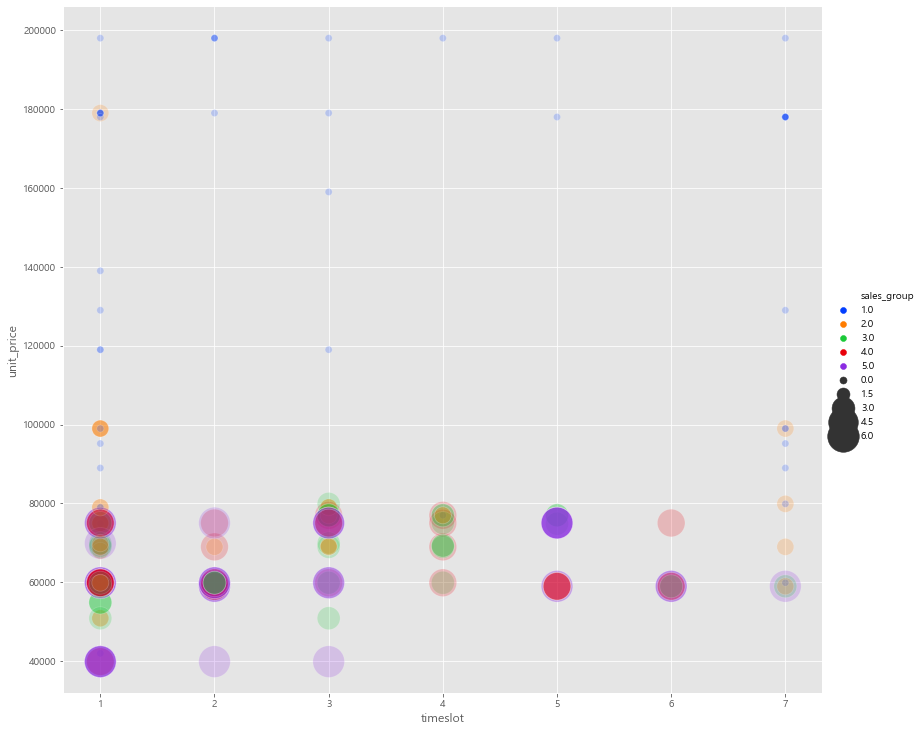

In [35]:
sns.relplot(x='timeslot',y='unit_price', palette='bright', size='sales_group', hue='sales_group', sizes=(50,1000), data=sum_df[sum_df['p_group']=='건강기능'], alpha=0.2, height=10.27, aspect=11.7/10.27)

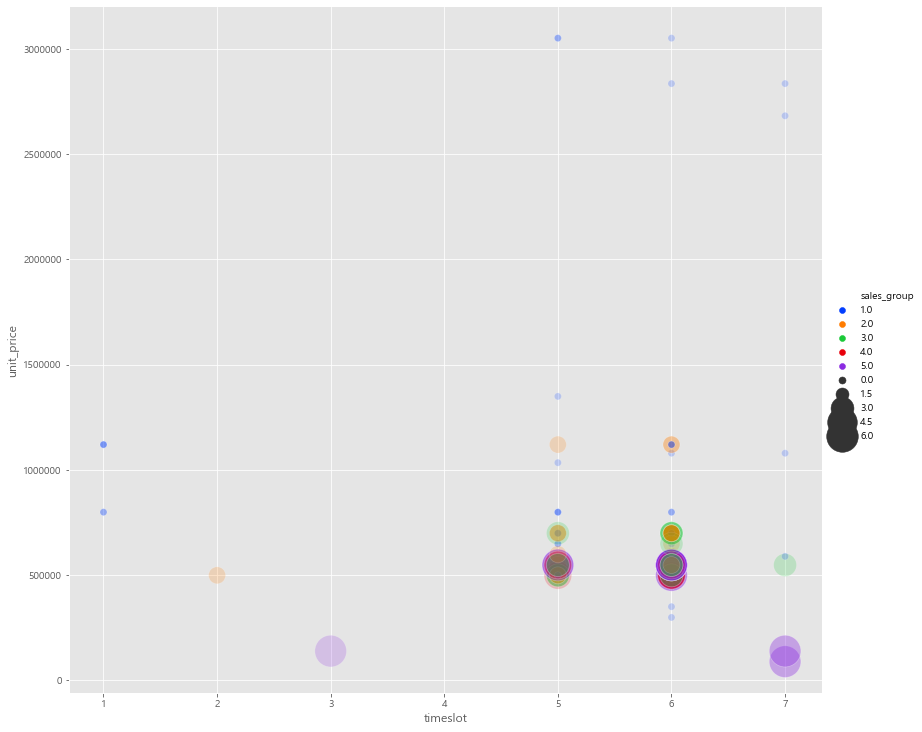

In [36]:
sns.relplot(x='timeslot',y='unit_price', palette='bright', size='sales_group', hue='sales_group', sizes=(50,1000), data=sum_df[sum_df['p_group']=='가구'], alpha=0.2, height=10.27, aspect=11.7/10.27)

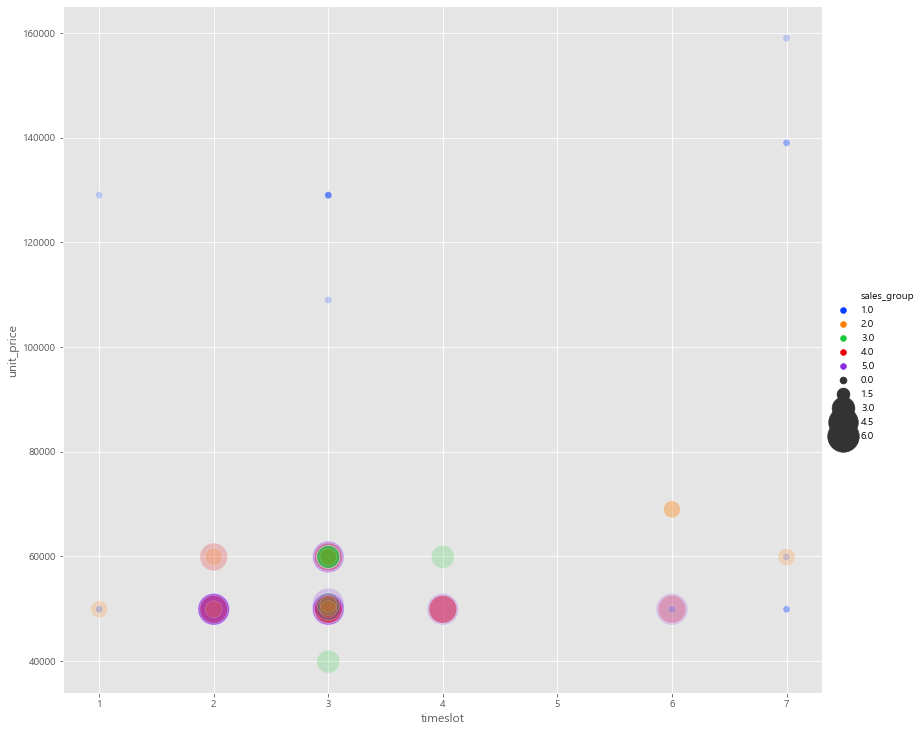

In [37]:
sns.relplot(x='timeslot',y='unit_price', palette='bright', size='sales_group', hue='sales_group', sizes=(50,1000), data=sum_df[sum_df['p_group']=='침구'], alpha=0.2, height=10.27, aspect=11.7/10.27)

# 요일별

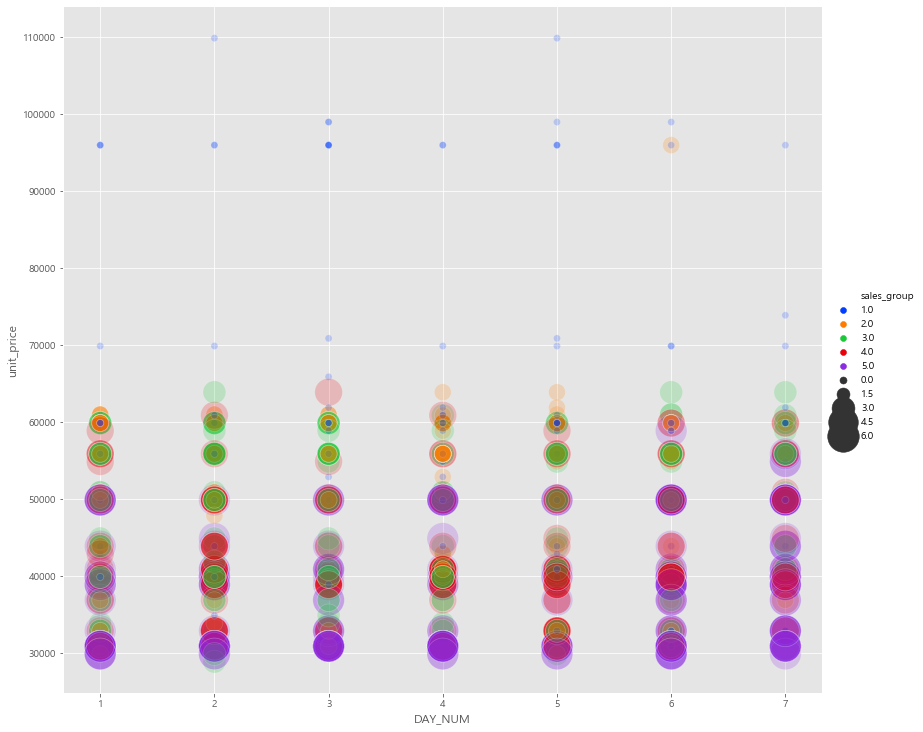

In [38]:
sns.relplot(x='DAY_NUM',y='unit_price', palette='bright', size='sales_group', hue='sales_group', sizes=(50,1000), data=sum_df[sum_df['p_group']=='농수축'], alpha=0.2, height=10.27, aspect=11.7/10.27)

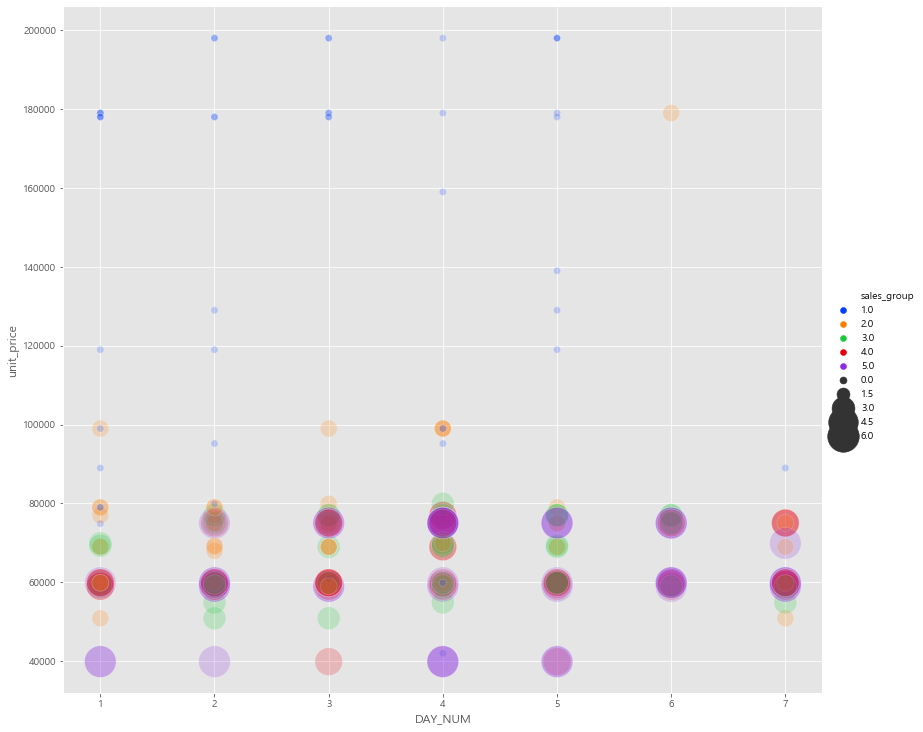

In [39]:
sns.relplot(x='DAY_NUM',y='unit_price', palette='bright', size='sales_group', hue='sales_group', sizes=(50,1000), data=sum_df[sum_df['p_group']=='건강기능'], alpha=0.2, height=10.27, aspect=11.7/10.27)

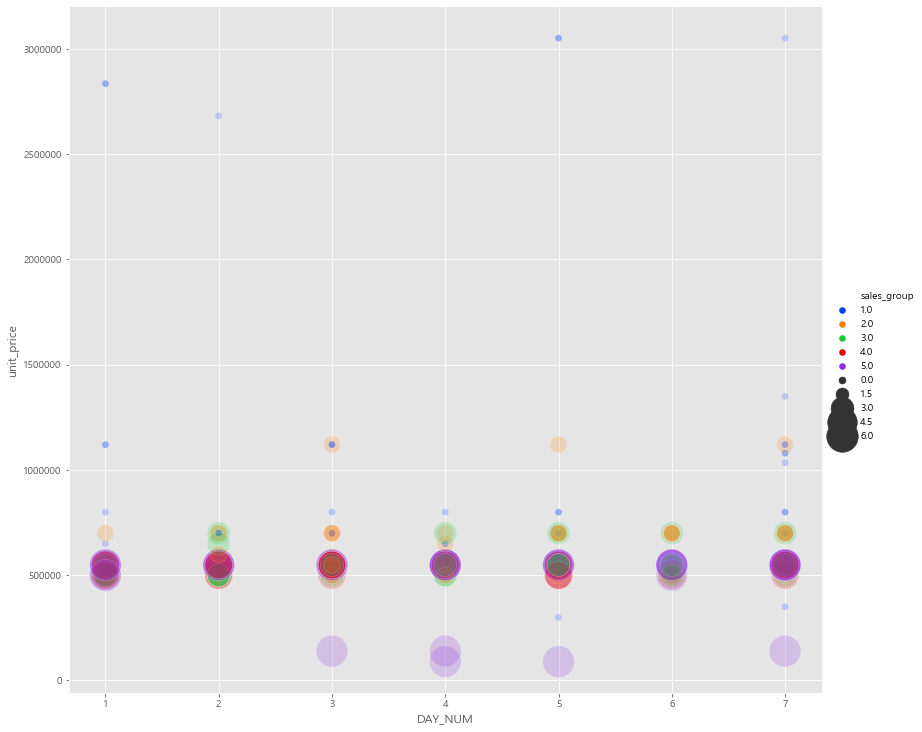

In [40]:
sns.relplot(x='DAY_NUM',y='unit_price', palette='bright', size='sales_group', hue='sales_group', sizes=(50,1000), data=sum_df[sum_df['p_group']=='가구'], alpha=0.2, height=10.27, aspect=11.7/10.27)

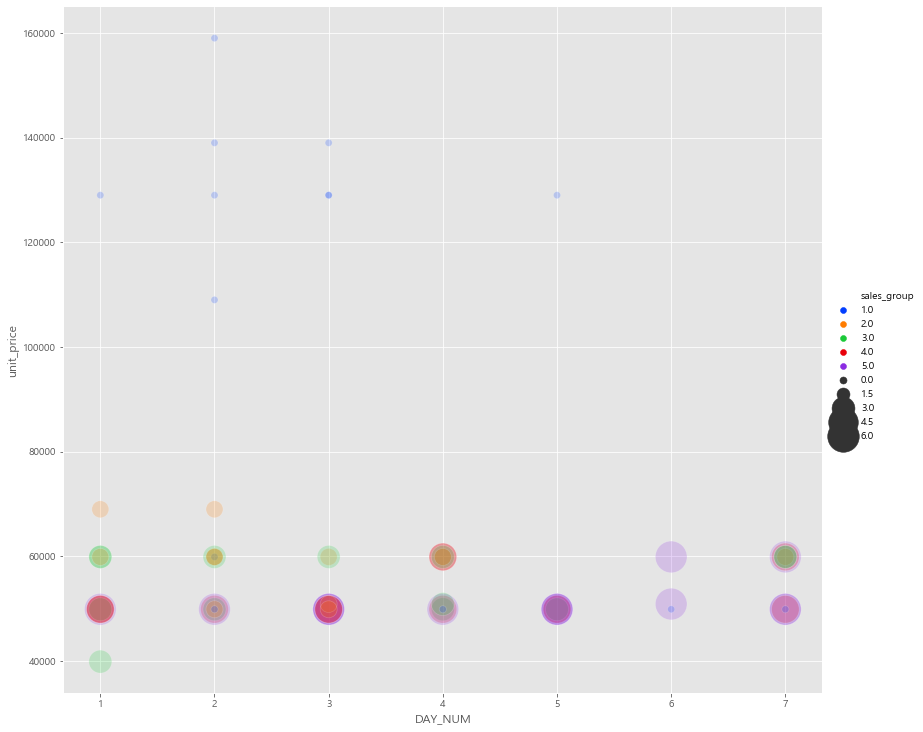

In [41]:
sns.relplot(x='DAY_NUM',y='unit_price', palette='bright', size='sales_group', hue='sales_group', sizes=(50,1000), data=sum_df[sum_df['p_group']=='침구'], alpha=0.2, height=10.27, aspect=11.7/10.27)

# 시즌별

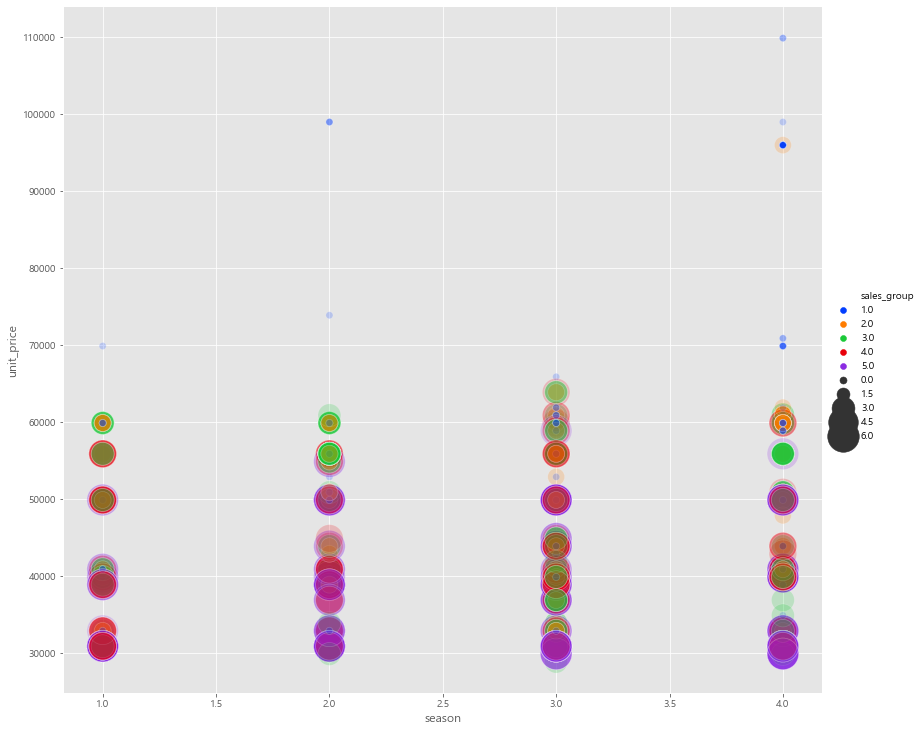

In [42]:
sns.relplot(x='season',y='unit_price', palette='bright', size='sales_group', hue='sales_group', sizes=(50,1000), data=sum_df[sum_df['p_group']=='농수축'], alpha=0.2, height=10.27, aspect=11.7/10.27)

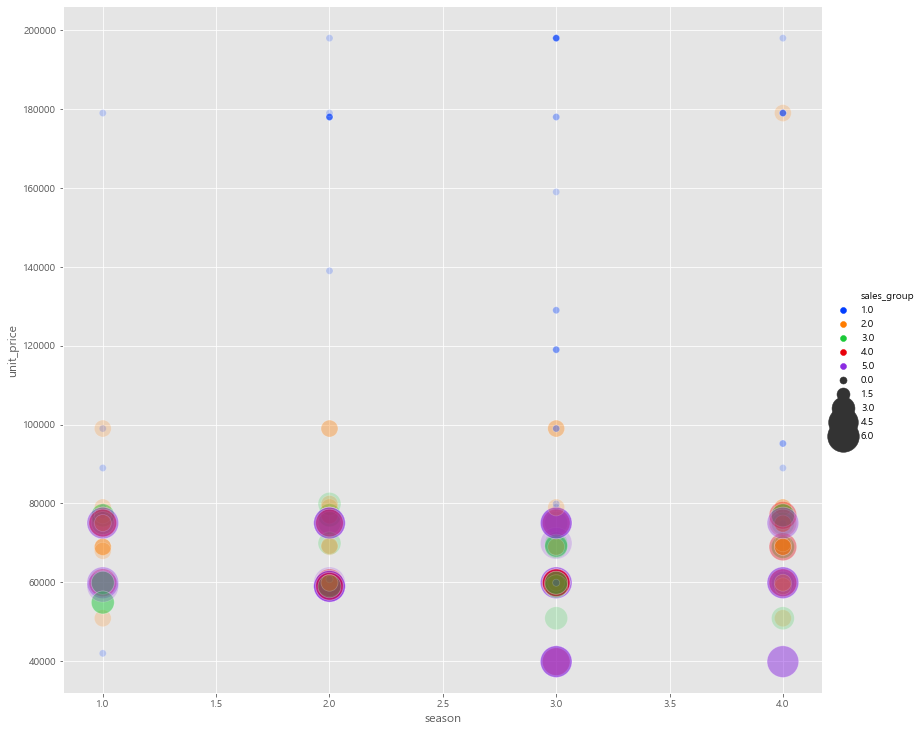

In [43]:
sns.relplot(x='season',y='unit_price', palette='bright', size='sales_group', hue='sales_group', sizes=(50,1000), data=sum_df[sum_df['p_group']=='건강기능'], alpha=0.2, height=10.27, aspect=11.7/10.27)

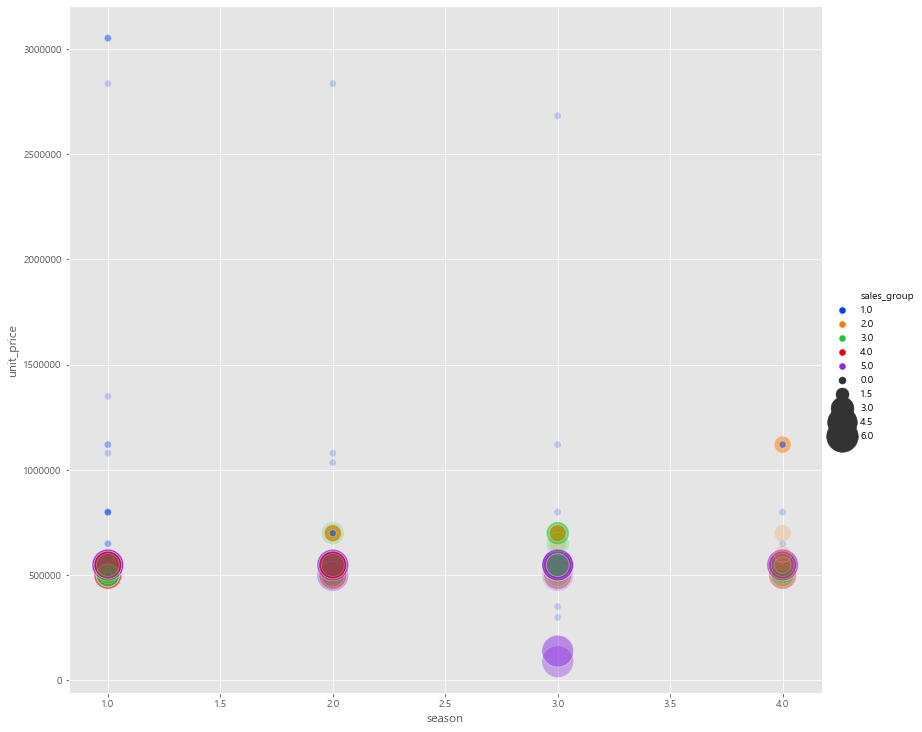

In [44]:
sns.relplot(x='season',y='unit_price', palette='bright', size='sales_group', hue='sales_group', sizes=(50,1000), data=sum_df[sum_df['p_group']=='가구'], alpha=0.2, height=10.27, aspect=11.7/10.27)

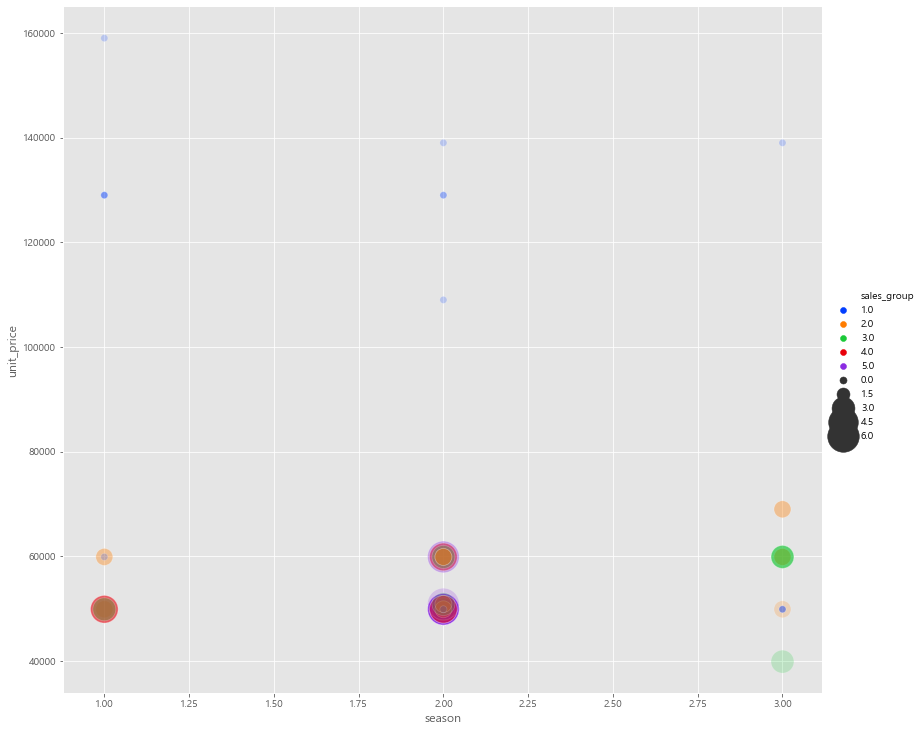

In [45]:
sns.relplot(x='season',y='unit_price', palette='bright', size='sales_group', hue='sales_group', sizes=(50,1000), data=sum_df[sum_df['p_group']=='침구'], alpha=0.2, height=10.27, aspect=11.7/10.27)

# 휴일 or 공휴일 ... 구분의 의미가 없어보인다. 통계적 검정 추가해보기?!

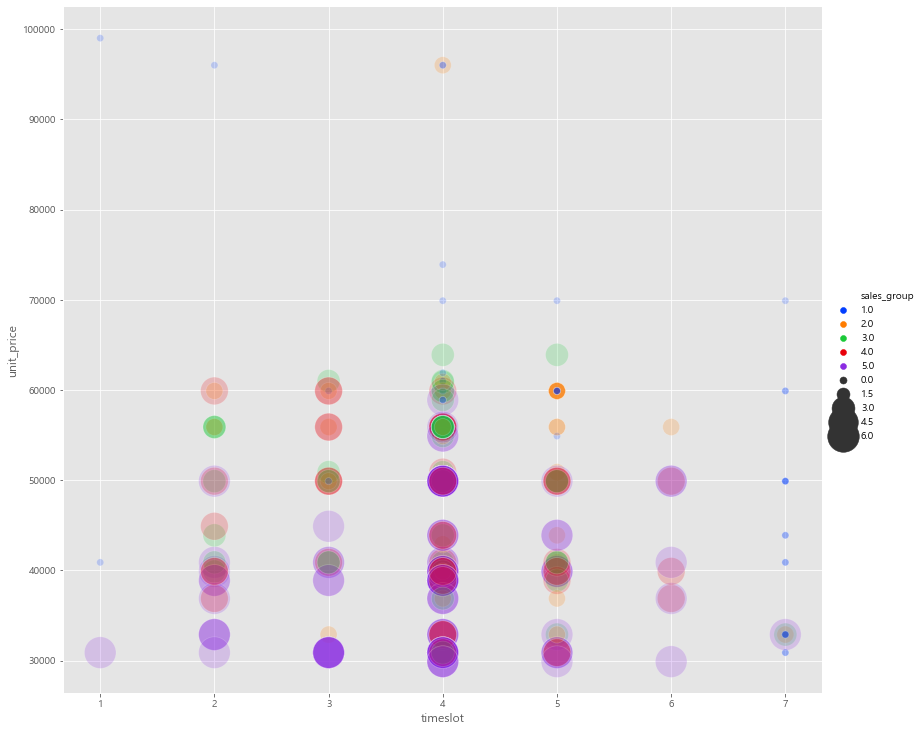

In [46]:
sns.relplot(x='timeslot',y='unit_price', palette='bright', size='sales_group', hue='sales_group', sizes=(50,1000), data=sum_df[(sum_df['p_group']=='농수축')&(sum_df['holiday']==1)], alpha=0.2, height=10.27, aspect=11.7/10.27)

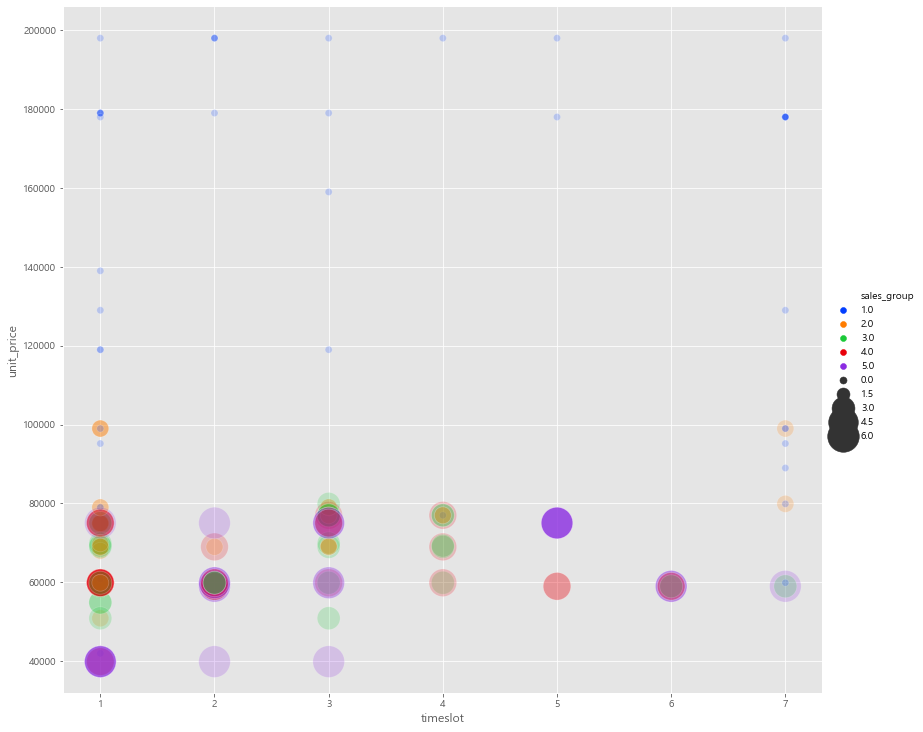

In [47]:
sns.relplot(x='timeslot',y='unit_price', palette='bright', size='sales_group', hue='sales_group', sizes=(50,1000), data=sum_df[(sum_df['p_group']=='건강기능')&(sum_df['holiday']==0)], alpha=0.2, height=10.27, aspect=11.7/10.27)

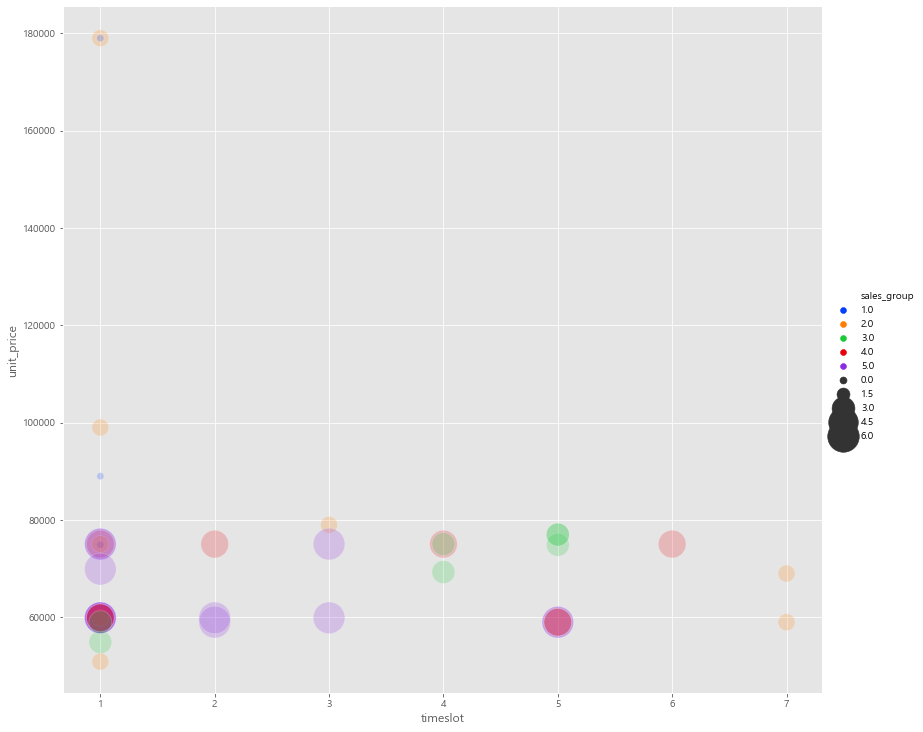

In [48]:
sns.relplot(x='timeslot',y='unit_price', palette='bright', size='sales_group', hue='sales_group', sizes=(50,1000), data=sum_df[(sum_df['p_group']=='건강기능')&(sum_df['holiday']==1)], alpha=0.2, height=10.27, aspect=11.7/10.27)

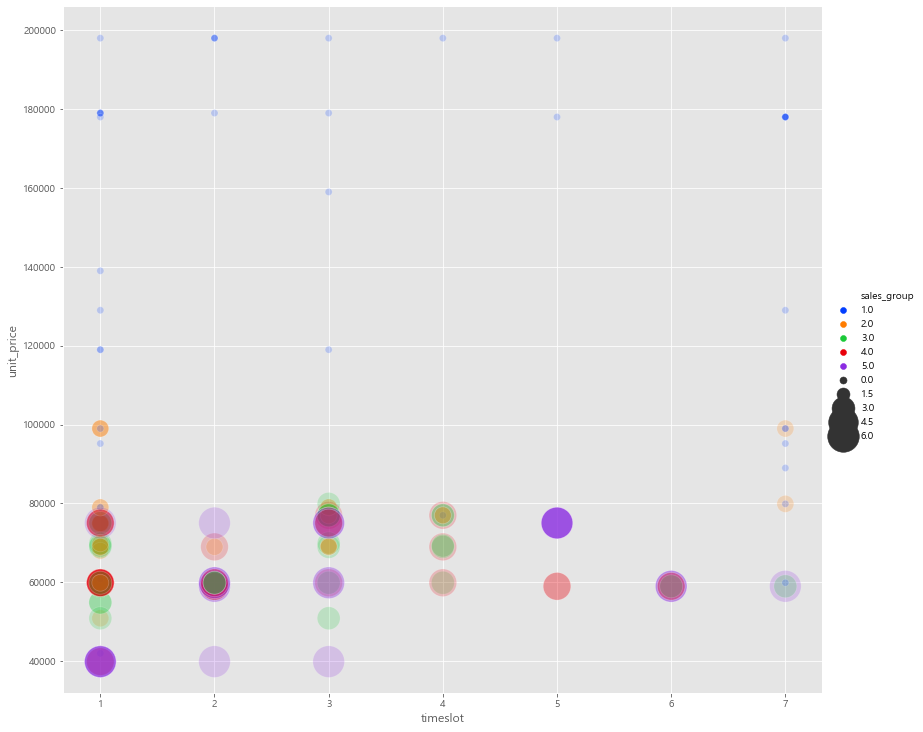

In [49]:
sns.relplot(x='timeslot',y='unit_price', palette='bright', size='sales_group', hue='sales_group', sizes=(50,1000), data=sum_df[(sum_df['p_group']=='건강기능')&(sum_df['holiday']==0)], alpha=0.2, height=10.27, aspect=11.7/10.27)

어떤 구간의 판매량 / 전체 판매량 > 0.5인 어떤 구간을 찾아서 그 구간 안의 sales_group이 1(최하)인 상품들을 추려낸다.

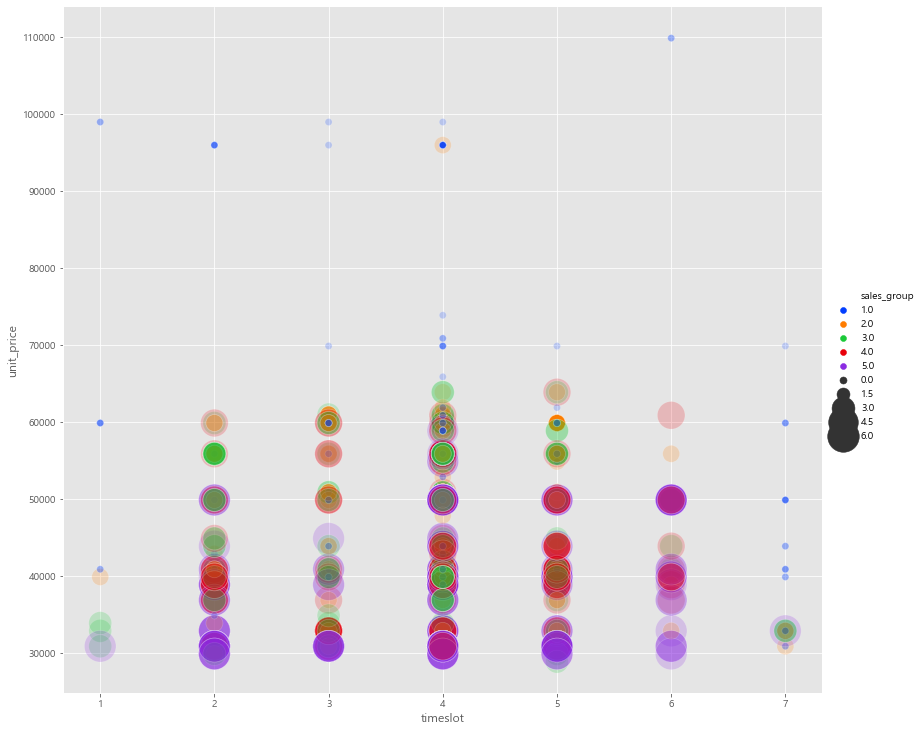

In [50]:
sns.relplot(x='timeslot',y='unit_price', palette='bright', size='sales_group', hue='sales_group', sizes=(50,1000), data=sum_df[sum_df['p_group']=='농수축'], alpha=0.2, height=10.27, aspect=11.7/10.27)

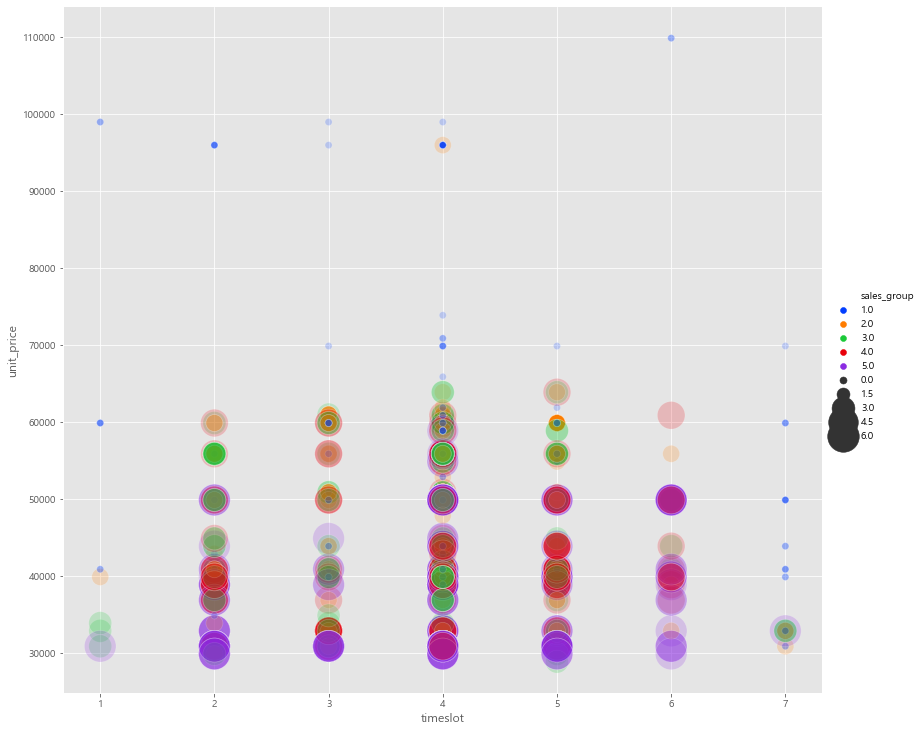

In [51]:
sns.relplot(x='timeslot',y='unit_price', palette='bright', size='sales_group', hue='sales_group', sizes=(50,1000), data=sum_df[sum_df['p_group']=='농수축'], alpha=0.2, height=10.27, aspect=11.7/10.27)

In [52]:
list(sum_df.p_group.unique())

['의류', '속옷', '주방', '농수축', '이미용', '가전', '생활용품', '건강기능', '잡화', '가구', '침구']

In [83]:
interested_group = list(sum_df.p_group.unique())

group_solution_dict = {}

for group in interested_group:
    df = sum_df[sum_df['p_group']==group]
    solution_list = []
    df_total_sales = df.sales.sum()
    print(group,'의 unit_price 개수:',len(df.unit_price.unique()))
    for idx, x in enumerate(sorted(df.unit_price.unique())):
        if idx % 10 == 0:
            print(idx, x)
        for y in sorted(df.unit_price.unique()):
            if x >= y:
                continue
            elif ((df[(df['unit_price'] >= x) & (df['unit_price'] <= y)].sales.sum() / df_total_sales) >= 0.495) &\
            ((df[(df['unit_price'] >= x) & (df['unit_price'] <= y)].sales.sum() / df_total_sales) <= 0.505):
                solution_list.append((x,y))
    group_solution_dict[group]=solution_list
group_solution_dict

의류 의 unit_price 개수: 48
0 29000
10 44900
20 66000
30 129000
40 399000
속옷 의 unit_price 개수: 26
0 29900
10 63200
20 109000
주방 의 unit_price 개수: 75
0 24900
10 50900
20 64800
30 79800
40 93000
50 123000
60 179000
70 254000
농수축 의 unit_price 개수: 34
0 28900
10 41900
20 55900
30 73900
이미용 의 unit_price 개수: 14
0 39800
10 69800
가전 의 unit_price 개수: 33
0 164000
10 829000
20 1330000
30 1959000
생활용품 의 unit_price 개수: 61
0 12800
10 39900
20 52900
30 89000
40 129000
50 219000
60 1880000
건강기능 의 unit_price 개수: 26
0 39900
10 69900
20 129000
잡화 의 unit_price 개수: 50
0 29000
10 49800
20 79800
30 169000
40 380000
가구 의 unit_price 개수: 18
0 89000
10 799000
침구 의 unit_price 개수: 9
0 39900


{'의류': [(29000, 49800),
  (34000, 59000),
  (40800, 79000),
  (44000, 79000),
  (49800, 299000),
  (49800, 399000),
  (49800, 499000),
  (49800, 690000),
  (49900, 399000),
  (49900, 499000),
  (49900, 690000),
  (49900, 699000),
  (49900, 1490000),
  (49900, 1590000),
  (49900, 1690000),
  (49900, 2490000)],
 '속옷': [(59900, 109000)],
 '주방': [(24900, 89000),
  (29800, 89000),
  (39900, 89800),
  (39900, 90000),
  (39900, 90800),
  (39900, 93000),
  (41900, 99000),
  (41900, 104000),
  (49000, 99000),
  (49000, 104000),
  (49800, 104000),
  (61800, 154000),
  (79800, 198000),
  (79900, 198000),
  (79900, 199000),
  (80000, 198000),
  (80000, 199000),
  (80000, 208000),
  (84000, 198000),
  (84000, 199000),
  (84000, 208000),
  (84800, 208000),
  (88800, 209000),
  (88800, 219000),
  (88800, 228000),
  (88800, 229000),
  (89000, 209000),
  (89000, 219000),
  (89000, 228000),
  (89000, 229000),
  (89000, 238000),
  (89000, 239000),
  (89000, 254000),
  (89000, 259000),
  (89000, 309000),


In [84]:
picked_solutions = {}

for group in interested_group:
    if len(group_solution_dict[group]) == 0:
        continue
    elif len(group_solution_dict[group]) == 1:
        picked_solutions[group] = group_solution_dict[group][0]
        continue
    else:
        min_range = abs(group_solution_dict[group][0][0]-group_solution_dict[group][0][1])
        chosen_values = (group_solution_dict[group][0][0], group_solution_dict[group][0][1])
        for x, y in group_solution_dict[group][1:]:
            if min_range > abs(x-y):
                min_range = abs(x-y)
                chosen_values = (x,y)
    picked_solutions[group] = chosen_values

In [86]:
picked_solutions

{'의류': (29000, 49800),
 '속옷': (59900, 109000),
 '주방': (39900, 89800),
 '농수축': (40900, 60900),
 '생활용품': (29800, 59800),
 '건강기능': (59000, 69300),
 '잡화': (29800, 48900)}

In [56]:
picked_solutions

{'의류': (29000, 49800),
 '속옷': (59900, 109000),
 '주방': (39900, 89800),
 '농수축': (40900, 60900),
 '생활용품': (29800, 59800),
 '건강기능': (59000, 69300),
 '잡화': (29800, 48900)}

In [87]:
high_low_dict = {}
for key, value in list(picked_solutions.items()):
    x, y = value
    low_df = df_split(key)[(df_split(key).unit_price >= x) & (df_split(key).unit_price <= y)&((df_split(key).sales_group==1)|(df_split(key).sales_group==2))]
    high_df = df_split(key)[(df_split(key).unit_price >= x) & (df_split(key).unit_price <= y)&((df_split(key).sales_group==4)|(df_split(key).sales_group==5))]
    high_low_dict[key] = pd.concat([high_df,low_df], axis=0)

In [90]:
import pickle

with open('c:/bc/high_low_dict.pickle', 'wb') as f:
    pickle.dump(high_low_dict, f)

In [97]:
high_low_dict['건강기능'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 186 to 6934
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   broadcast     69 non-null     object 
 1   exp_min       69 non-null     float64
 2   m_code        69 non-null     int64  
 3   p_code        69 non-null     int64  
 4   p_name        69 non-null     object 
 5   p_group       69 non-null     object 
 6   unit_price    69 non-null     int64  
 7   total_price   69 non-null     float64
 8   sales         69 non-null     float64
 9   YEAR          69 non-null     int64  
 10  MONTH         69 non-null     int64  
 11  DAY           69 non-null     int64  
 12  HOUR          69 non-null     int64  
 13  MINUTE        69 non-null     int64  
 14  SECOND        69 non-null     int64  
 15  YEAR_DAY      69 non-null     object 
 16  DAY_NAME      69 non-null     object 
 17  DAY_NUM       69 non-null     int64  
 18  p_group_code  69 non-null   

In [67]:
with open('c:/bc/high_perform_dict.pickle', 'wb') as f:
    pickle.dump(high_perform_dict, f)

unit_price_range 못구한 것들(['이미용','가전','침구','가구']) 범위 조정하기

In [ ]:
rest_group = ['이미용','가전','침구','가구']
rest_group_solution_dict = {}

for group in rest_group:
    df = sum_df[sum_df['p_group']==group]
    solution_list = []
    df_total_sales = df.sales.sum()
    print(group,'의 unit_price 개수:',len(df.unit_price.unique()))
    for idx, x in enumerate(sorted(df.unit_price.unique())):
        for y in sorted(df.unit_price.unique()):
            if x >= y:
                continue
            elif ((df[(df['unit_price'] >= x) & (df['unit_price'] <= y)].sales.sum() / df_total_sales) >= 0.41) &\
            ((df[(df['unit_price'] >= x) & (df['unit_price'] <= y)].sales.sum() / df_total_sales) <= 0.59):
                solution_list.append((x,y))
    rest_group_solution_dict[group]=solution_list
rest_group_solution_dict

In [ ]:
low_nsc = low_perform_dict['농수축']
high_nsc = high_perform_dict['농수축']

In [ ]:
low_nsc['score'] = 0
high_nsc['score'] = 1

In [ ]:
nsc = pd.concat([low_nsc, high_nsc], axis=0)

In [ ]:
nsc['sales_min'] = nsc['sales'] / nsc['exp_min']

In [ ]:
# df[["A", "B"]] = min_max_scaler.fit_transform(df[["A", "B"]])
scaler = StandardScaler()

nsc[['exp_min','unit_price']] = scaler.fit_transform(nsc[['exp_min','unit_price']])

In [ ]:
nsc

In [ ]:
nsc_data = nsc[['exp_min','unit_price','DAY_NUM','season','timeslot','holiday','score']]
nsc_data.timeslot = nsc_data.timeslot.astype('int64')

nsc_data = pd.get_dummies(nsc_data, columns=['season'])
nsc_data = pd.get_dummies(nsc_data, columns=['holiday'])
nsc_data = pd.get_dummies(nsc_data, columns=['DAY_NUM'])
nsc_data = pd.get_dummies(nsc_data, columns=['timeslot'])


data = np.array(nsc_data)

x = data[:,0:-1]
y = data[:,-1]

trainX, testX, trainY, testY = train_test_split(x,y,test_size=0.2)

model = LogisticRegression()
model.fit(trainX, trainY)

print("* 학습용 데이터로 측정한 정확도 = %.2f" % model.score(trainX, trainY))
print("* 시험용 데이터로 측정한 정확도 = %.2f" % model.score(testX, testY))

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dt.fit(trainX,trainY)

In [ ]:
plot_tree(dt)

In [ ]:
nsc_data.columns

In [ ]:
fi = dt.feature_importances_
fn = list(nsc_data.columns)
n_f = trainX.shape[1]
idx = np.arange(n_f)
plt.barh(idx,fi,align = 'center')
plt.yticks(idx,fn,size=12)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(max_depth=3, n_estimators=100)
rf.fit(trainX, trainY)
fi = rf.feature_importances_
fn = list(nsc_data.columns)
n_f = trainX.shape[1]
idx = np.arange(n_f)
plt.barh(idx,fi,align = 'center')
plt.yticks(idx,fn,size=12)
plt.show()